To calculate noise we are using the formula

$\sigma_q^2 = 1/(2NM) \sum_{m=0}^{M-1}  \sum_{n=0}^{N-1} (y^A[m][n]-y^B[m][n])^2  $


In [6]:
%pylab inline
# from Processing import *  
from scipy import misc 
import numpy as np  
import matplotlib.pyplot as plt
from PIL import Image 
import os  
import copy

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
# Load phase and z-peak data

# set  path
logPath1 = "C:\\ProgramData\\Sumix\\MaxInspect\\surface12_1756\\Logs"
# logPath2 = "C:\\ProgramData\\Sumix\\MaxInspect\\surface13_1758\\Logs" #  good
logPath2 = "C:\\ProgramData\\Sumix\\MaxInspect\\surface14_1760\\Logs" # very bad (permanent shock)
# logPath2 = "C:\\ProgramData\\Sumix\\MaxInspect\\surface17_1766\\Logs" #  bad (single shock)
# logPath1 = "C:\\ProgramData\\Sumix\\MaxInspect\\surface20_1813\\Logs" #  good
# logPath2 = "C:\\ProgramData\\Sumix\\MaxInspect\\surface21_1815\\Logs" #  good

# logPath1 = "C:\\ProgramData\\Sumix\\MaxInspect\\QM39004_12_1797\\Logs" #  good
# logPath2 = "C:\\ProgramData\\Sumix\\MaxInspect\\QM39004_13_1799\\Logs" #  good
logPath1 = "C:\\ProgramData\\Sumix\\MaxInspect\\SF3_1821\\Logs" #  good
logPath2 = "C:\\ProgramData\\Sumix\\MaxInspect\\SF4_1823\\Logs" #  good

phaseFile = "Phases.txt"
zPeakFile = "ZPFiltered.txt"
# zPeakFile = "ZPeaks.txt"
piezoDistance = "piezoDistance.txt"
W=800; H=600
size = (W, H)

# phase1 =  np.zeros(size, dtype=float)
path1 = logPath1 +"\\" + phaseFile
phase1 =np.transpose( np.loadtxt(path1 ))
 
path2 = logPath2 +"\\" + phaseFile
phase2 =np.transpose( np.loadtxt(path2 ))
# print phase1.shape
print phase1[:,100]  
print phase1[100,:] 

zpath1 = logPath1 +"\\" + zPeakFile
zPeak1 =np.transpose( np.loadtxt(zpath1 )) 
zpath2 = logPath2 +"\\" + zPeakFile
zPeak2 =np.transpose( np.loadtxt(zpath2 ))
meanDiff =  ( zPeak1[:,100] - zPeak2[:,100]).mean()
diff = (zPeak1 - zPeak2 ) - meanDiff
# print zPeak1.shape, meanDiff, np.std(diff[diff<1])
# print diff
# print  np.count_nonzero(diff[diff>70]  ) 
largeDiff = diff[diff>1]
smallDiff = diff[diff<=1]
# print largeDiff.shape, largeDiff
# print smallDiff.shape,  smallDiff 


[  1.71753000e-01   7.53364000e-02  -3.35519000e-03  -9.19172000e-02
  -1.81942000e-01  -2.67086000e-01  -3.52554000e-01  -4.40729000e-01
   4.69912000e-01   3.85065000e-01   3.03695000e-01   2.10241000e-01
   1.22615000e-01   3.38179000e-02  -5.14673000e-02  -1.36336000e-01
  -2.19191000e-01  -3.06617000e-01  -3.86358000e-01  -4.76625000e-01
   4.41734000e-01   3.59243000e-01   2.70770000e-01   1.88475000e-01
   1.05689000e-01   1.74422000e-02  -5.98159000e-02  -1.44054000e-01
  -2.25458000e-01  -3.08395000e-01  -3.87912000e-01  -4.69449000e-01
   4.49581000e-01   3.59431000e-01   2.84307000e-01   2.01930000e-01
   1.23444000e-01   4.21132000e-02  -4.17296000e-02  -1.20429000e-01
  -1.94897000e-01  -2.77861000e-01  -3.54041000e-01  -4.29320000e-01
   4.92521000e-01   4.11071000e-01   3.28952000e-01   2.49895000e-01
   1.75791000e-01   9.13940000e-02   2.43008000e-02  -5.33911000e-02
  -1.36294000e-01  -2.12866000e-01  -2.90273000e-01  -3.65218000e-01
  -4.37289000e-01   4.83936000e-01

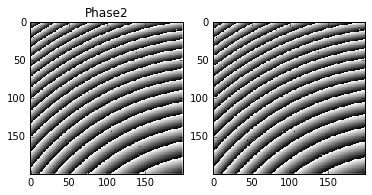

In [8]:
  
#     plot phase images 
phaseImg1 = Image.fromarray( np.copy (phase1[0:199, 0:199]*255).astype(np.uint8) , 'L')
phaseImg2 = Image.fromarray( np.copy (phase1[0:199, 0:199]*255).astype(np.uint8) , 'L')
fig = plt.figure(1)
plt.gray()
ax1 = fig.add_subplot(121)
ax1.set_title('Phase1') 
ax2 = fig.add_subplot(122)
ax1.set_title('Phase2') 
ax1.imshow(phaseImg1, interpolation='none', vmin=0 , vmax=255 )
ax2.imshow(phaseImg2, interpolation='none', vmin=0 , vmax=255 )  
 
plt.show()

64.9484501928 -12.4532501928 29.1444498072
63.841822247 -11.521222247 29.1444498072
sigm = 0.940855090614


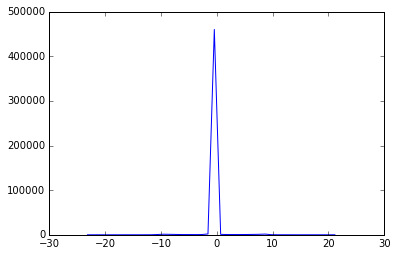

In [9]:
# calculate noise between measurement

z1 = copy.deepcopy (zPeak1[1:W-2, 1:H-2]  ) 
z1mean = np.mean(z1 [z1>0])
z1 [z1==0] = z1mean #np.NaN
z1 = z1  - z1mean 
print z1mean,  np.min (z1[z1!=0] ),  np.max (z1[ z1>0]  )  
z2 = copy.deepcopy (zPeak2[1:W-2, 1:H-2]) 
z2mean = np.mean(z2 [z2>0])
z2 [z2==0] = z2mean #np.NaN
z2 =z2 - z2mean 
print z2mean, np.min (z2  ),  np.max (z1  )  
imdist  = (z1 - z2 )  # * (z1!=0) * (z2!=0)
imdist2 = imdist *imdist
 
sigm = np.sqrt(float( imdist2.sum())/ (2*imdist2.size))
print "sigm =", sigm 

# gaussian fitting

# def gaus(x,a,x0,sigma):
#     return a*np.exp(-(x-x0)**2/(2*sigma**2))

# x = np.array(range(imdist.size  )) 
# y= imdist.flatten() 

# from scipy.optimize import curve_fit
# popt, pcov = curve_fit(gaus, x, y, p0=[1,0,sigm])
# print "Gaussian fitting  [ ampl, mean, sigma]: " ,popt  

hst = np.histogram(imdist, bins=40, range=None, normed=False, weights=None, density=None) 
plt.plot (hst[1][0:40], hst[0]) 
plt.show()

In [10]:
 # calculate noise in one measurement
zw, zh =z1.shape
z1dist = z1[0:zw-2, :] -  z1[1:zw-1, :]
z1dist2 = z1dist*z1dist
z1sigm = np.sqrt(float( z1dist2.sum())/ (2*z1dist2.size))

z1Vdist = z1 [:, 0:zh-2] -  z1[:, 1:zh-1]
z1Vdist2 = z1Vdist*z1Vdist
z1Vsigm = np.sqrt(float( z1Vdist2.sum())/ (2*z1Vdist2.size))
print "Surface 1. sigmH =", z1sigm,"sigmV =",z1Vsigm  
 
zw, zh =z2.shape
z2dist = z2[0:zw-2, :] -  z2[1:zw-1, :]
z2dist2 = z2dist*z2dist
z2sigm = np.sqrt(float( z2dist2.sum())/ (2*z2dist2.size)) 

z2Vdist = z2[:, 0:zh-2] -  z2[:, 1:zh-1]
z2Vdist2 = z2Vdist*z2Vdist
z2Vsigm = np.sqrt(float( z2Vdist2.sum())/ (2*z2Vdist2.size))
print "Surface 2.  sigmH =", z2sigm,"sigmV =",z2Vsigm 

Surface 1. sigmH = 0.667015092542 sigmV = 0.75414828965
Surface 2.  sigmH = 0.658507255159 sigmV = 0.746845484105


In [5]:
# piezo distance graphics
piezopath1 = logPath1 +"\\" + piezoDistance
piezo1 = np.loadtxt(piezopath1 ) 
piezopath2 = logPath2 +"\\" + piezoDistance
piezo2 = np.loadtxt(piezopath2 ) 
x1 =  range(piezo1.size )
plt.plot (x1, piezo1) 
x2 =  range(piezo2.size )
plt.plot (x2, piezo2) 
plt.show()

NameError: name 'logPath1' is not defined

In [6]:
print piezo1

[   0.          0.315023    0.630386    0.946088    1.26213     1.57851
    1.89523     2.21229     2.52969     2.84742     3.1655      3.48392
    3.80267     4.12177     4.4412      4.76098     5.08109     5.40154
    5.72233     6.04347     6.08504     6.12975     6.22682     6.30506
    6.65185     6.72725     6.7417      6.74659     6.75462     6.76646
    6.81311     6.84087     6.84808     6.87806     7.21861     7.22706
    7.27087     7.30963     7.47282     7.51901     7.56876     7.99478
    8.27658     8.28797     8.28964     8.30931     8.44173     8.44356
    8.89336     8.89977     9.35434     9.39875     9.59427     9.78983
   10.2765     10.7557     11.1587     11.4563     11.471      11.7948
   12.1299     12.4653     12.801      13.1371     13.4735     13.8102
   14.1473     14.4847     14.8224     15.1605     15.499      15.8378
   16.1769     16.5163     16.8561     17.1963     17.5367     17.8775
   18.2187     18.5602     18.902      19.2442     19.5867     19.92